A few usage tests of different pseudo random number generators (PRNGs) (PCG64 and Mersenne Twister 19937).

# Import libraries

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

#from numpy.random import seed, rand
from numpy.random import Generator, PCG64, MT19937

# PRNG usage tests

## PCG64
The 64-bit Permuted Congruential Generator (PCG64) (https://www.pcg-random.org)

In [2]:
#--- Set up PRNG: ---
seed= 42                     # Set seed of PRNG state 
rg = Generator(PCG64(seed))  # Initialize bit generator (here PCG64) with seed
print(f"PRNG: {rg.bit_generator}")

#%%timeit
M = int(1e7)
rand_floats = rg.random(M)

N = 100
rand_ints = rg.integers(0,N,M)

Q = 1000
rand_fs = np.reshape(rand_floats,[-1,Q])
rand_f = np.mean(rand_fs,axis=1)



PRNG: <numpy.random._pcg64.PCG64 object at 0x000001F8E8CFF880>


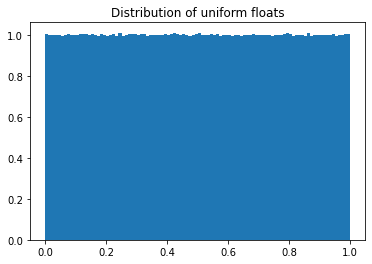

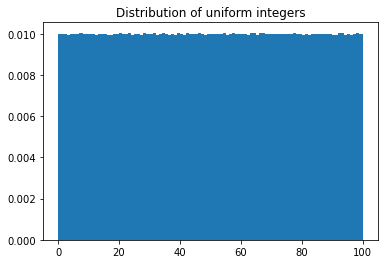

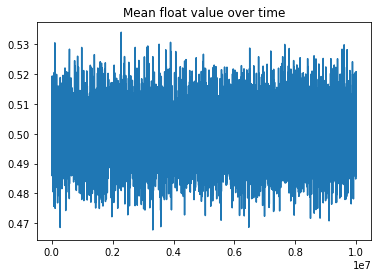

In [3]:
fig1 = plt.figure()
ax1 = plt.subplot()
ax1.set_title('Distribution of uniform floats')
ax1.hist(rand_floats, np.linspace(0,1,101), density=True);

fig2 = plt.figure()
ax2 = plt.subplot()
ax2.set_title('Distribution of uniform integers')
ax2.hist(rg.integers(0,N,M), np.linspace(0,N,101), density=True);

fig3 = plt.figure()
ax3 = plt.subplot()
ax3.set_title('Mean float value over time')
plt.plot(Q * np.arange(M / Q), rand_f)

## MT19937 
The Mersenne Twister 19937 generator (http://www.math.sci.hiroshima-u.ac.jp/m-mat/MT/emt.html).
Its name comes from its period length of $2^{19937}-1$, a Mersenne prime.

In [4]:
rg = Generator(MT19937(seed))  # Initialize bit generator (here Mersenne Twister 19937) with seed
print(f"PRNG: {rg.bit_generator}")

#%%timeit
M = int(1e7)
rand_floats = rg.random(M)

N = 100
rand_ints = rg.integers(0,N,M)

Q = 1000
rand_fs = np.reshape(rand_floats,[-1,Q])
rand_f = np.mean(rand_fs,axis=1)


PRNG: <numpy.random._mt19937.MT19937 object at 0x000001F8E8552F10>


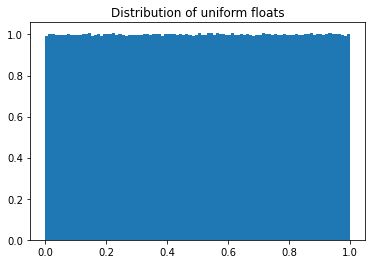

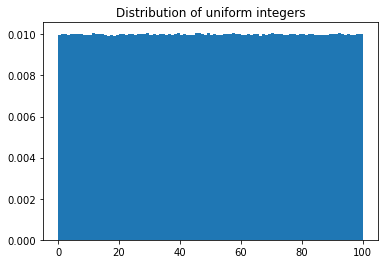

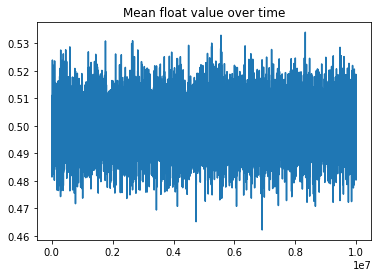

In [5]:
fig1 = plt.figure()
ax1 = plt.subplot()
ax1.set_title('Distribution of uniform floats')
ax1.hist(rand_floats, np.linspace(0,1,101), density=True);

fig2 = plt.figure()
ax2 = plt.subplot()
ax2.set_title('Distribution of uniform integers')
ax2.hist(rg.integers(0,N,M), np.linspace(0,N,101), density=True);

fig3 = plt.figure()
ax3 = plt.subplot()
ax3.set_title('Mean float value over time')
plt.plot(Q * np.arange(M / Q), rand_f)